<a href="https://colab.research.google.com/github/DanielGirald/Senalesysistemas/blob/main/Proyecto/corte_2/Avance_proyecto_Sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AVANCE PROYECTO SEÑALES Y SISTEMAS**

# **Integrantes:**
* Jerson Maldonado Lozano
* Freyder Stiven Giraldo
* Daniel David Giraldo Clavijo

# **1. Transformada de Fourier (FT, DFT, FFT)**

La Transformada de Fourier permite analizar el contenido frecuencial de una señal en el dominio del tiempo.

Transformada de Fourier (FT):

**Transformada de Fourier:**

$$
X(f) = \int_{-\infty}^{\infty} x(t) \, e^{-j 2\pi f t} \, dt
$$

**Transformada Discreta de Fourier (DFT):**

$$
X[k] = \sum_{n=0}^{N-1} x[n] \, e^{-j \frac{2\pi}{N} k n}, \quad k = 0, 1, ..., N-1
$$

**Transformada Rápida de Fourier (FFT):**

Algoritmo eficiente que calcula la DFT con una complejidad de:

$$
\mathcal{O}(N \log N)
$$



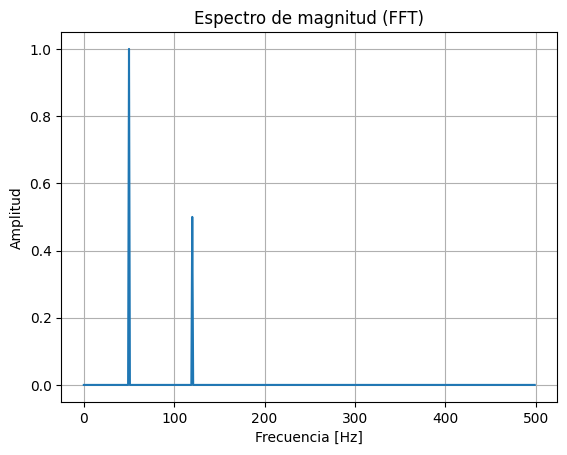

In [3]:
# 1. TRANSFORMADA DE FOURIER (FT, DFT, FFT)
# ---------------------------------------------

"""
La Transformada de Fourier permite descomponer una señal en sus componentes frecuenciales. En el contexto digital, se utiliza la DFT y su versión eficiente, la FFT.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Señal sintética: suma de senos
fs = 1000  # Frecuencia de muestreo [Hz]
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

# Transformada de Fourier
yf = fft(signal)
xf = fftfreq(fs, 1/fs)

plt.figure()
plt.plot(xf[:fs//2], 2/fs * np.abs(yf[:fs//2]))
plt.title("Espectro de magnitud (FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

# **2. Filtrado Digital (FIR/IIR)**

Los filtros digitales permiten atenuar o amplificar determinadas frecuencias de una señal.

Filtro FIR (Finite Impulse Response):
### Filtros Digitales (FIR e IIR)

**Filtro FIR (Finite Impulse Response):**

$$
y[n] = \sum_{k=0}^{M} b_k \, x[n - k]
$$

**Filtro IIR (Infinite Impulse Response):**

$$
y[n] = \sum_{k=0}^{M} b_k \, x[n - k] - \sum_{k=1}^{N} a_k \, y[n - k]
$$

Estos modelos permiten implementar filtros paso bajo, paso alto, paso banda y otros tipos, utilizando coeficientes \( a_k \) y \( b_k \) adecuados.


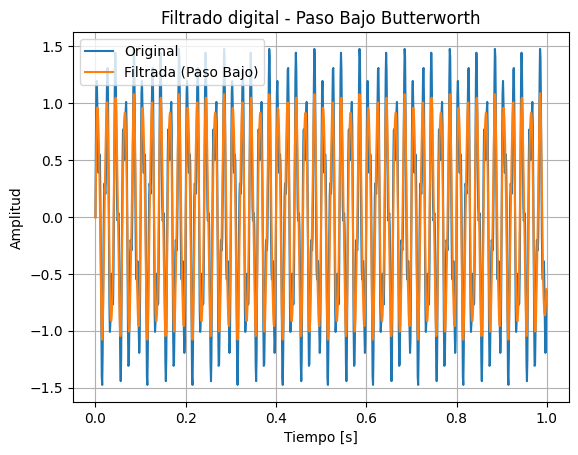

In [4]:
# 2. FILTRADO DIGITAL (FIR/IIR)
# ---------------------------------------------

"""
Los filtros digitales permiten modificar el contenido espectral de una señal. Los FIR tienen respuesta finita, los IIR infinita. Usamos un filtro paso bajo como ejemplo.
"""

from scipy.signal import butter, filtfilt

# Filtro paso bajo Butterworth
fc = 100  # Frecuencia de corte [Hz]
b, a = butter(N=4, Wn=fc/(fs/2), btype='low')
filtered_signal = filtfilt(b, a, signal)

plt.figure()
plt.plot(t, signal, label='Original')
plt.plot(t, filtered_signal, label='Filtrada (Paso Bajo)')
plt.title("Filtrado digital - Paso Bajo Butterworth")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

# **3. Transformada de Hilbert y Señales Analíticas**

La Transformada de Hilbert convierte una señal real en una señal analítica (compleja), usada para extraer las componentes en fase y en cuadratura.


### Transformada de Hilbert y Señal Analítica

**Transformada de Hilbert:**

$$
\hat{x}(t) = \mathcal{H}\{x(t)\} = \frac{1}{\pi} \, \text{P.V.} \int_{-\infty}^{\infty} \frac{x(\tau)}{t - \tau} \, d\tau
$$

**Señal Analítica:**

$$
z(t) = x(t) + j \, \hat{x}(t)
$$

Componentes:


$$
I(t) = \text{Re}\left\{ z(t) \right\} = x(t)
$$

$$
Q(t) = \text{Im}\left\{ z(t) \right\} = \hat{x}(t)
$$



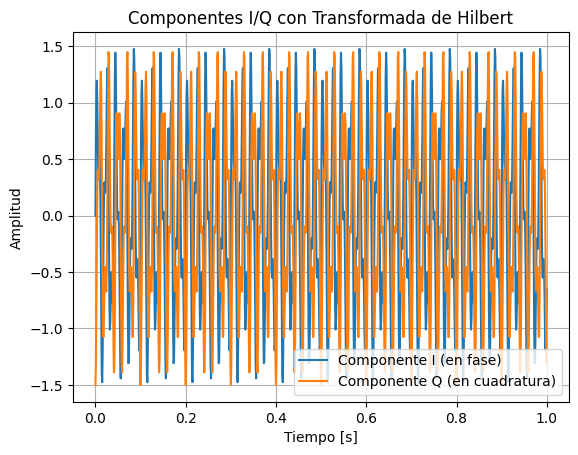

In [5]:
# 3. TRANSFORMADA DE HILBERT Y SEÑALES ANALÍTICAS
# ---------------------------------------------

"""
La Transformada de Hilbert permite construir la señal analítica (compleja) asociada a una señal real. Se usa para obtener componentes en fase (I) y cuadratura (Q).
"""

from scipy.signal import hilbert

analytic_signal = hilbert(signal)
I = np.real(analytic_signal)
Q = np.imag(analytic_signal)

plt.figure()
plt.plot(t, I, label="Componente I (en fase)")
plt.plot(t, Q, label="Componente Q (en cuadratura)")
plt.title("Componentes I/Q con Transformada de Hilbert")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

# **4. Modulación QAM (Quadrature Amplitude Modulation)**

La QAM modula dos señales ortogonales (coseno y seno) para transmitir simultáneamente datos en dos dimensiones: I (en fase) y Q (en cuadratura).


### Señal modulada en QAM

$$
s(t) = I(t) \cdot \cos(2\pi f_c t) - Q(t) \cdot \sin(2\pi f_c t)
$$


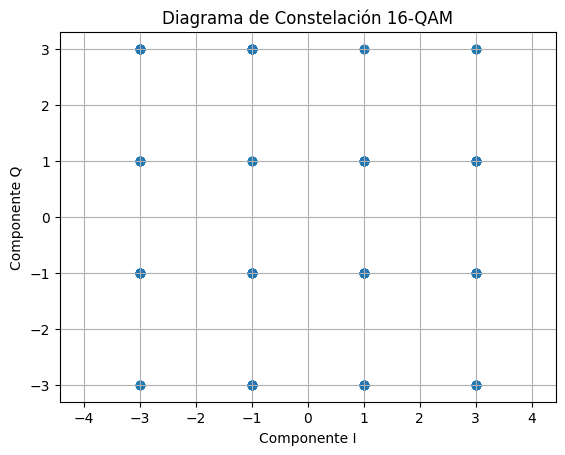

In [6]:
# 4. MODULACIÓN QAM (Amplitud en Cuadratura)
# ---------------------------------------------

"""
QAM combina amplitudes de dos portadoras ortogonales (coseno y seno). Aquí se simula una modulación 16-QAM simple con mapeo de símbolos.
"""

# Tabla de mapeo 16-QAM
qam_map = {
    (0,0,0,0): (-3, -3), (0,0,0,1): (-3, -1), (0,0,1,1): (-3, +1), (0,0,1,0): (-3, +3),
    (0,1,0,0): (-1, -3), (0,1,0,1): (-1, -1), (0,1,1,1): (-1, +1), (0,1,1,0): (-1, +3),
    (1,1,0,0): (+1, -3), (1,1,0,1): (+1, -1), (1,1,1,1): (+1, +1), (1,1,1,0): (+1, +3),
    (1,0,0,0): (+3, -3), (1,0,0,1): (+3, -1), (1,0,1,1): (+3, +1), (1,0,1,0): (+3, +3),
}

# Datos binarios aleatorios
bits = np.random.randint(0, 2, 400)
symbols = bits.reshape(-1, 4)
I_values, Q_values = [], []
for s in symbols:
    I_val, Q_val = qam_map[tuple(s)]
    I_values.append(I_val)
    Q_values.append(Q_val)

# Diagrama de constelación
plt.figure()
plt.scatter(I_values, Q_values)
plt.title("Diagrama de Constelación 16-QAM")
plt.xlabel("Componente I")
plt.ylabel("Componente Q")
plt.grid(True)
plt.axis('equal')
plt.show()


# **5. Multiplexación OFDM (Orthogonal Frequency Division Multiplexing)**

OFDM transmite múltiples subportadoras ortogonales simultáneamente, cada una con parte de la información total.

Símbolo OFDM generado por IFFT:


$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j \frac{2\pi k n}{N}}, \quad n = 0, 1, \dots, N-1
$$

**Donde:**

### Componentes de la señal OFDM

$$
N \text{ es el número de subportadoras}
$$

$$
X[k] \text{ son los datos complejos (por ejemplo, modulados en BPSK o QAM) en el dominio de la frecuencia}
$$

$$
x[n] \text{ es la señal transmitida en el dominio del tiempo}
$$



Esta técnica es robusta frente al desvanecimiento selectivo del canal y se utiliza ampliamente en estándares como **WiFi**, **LTE** y **5G**.


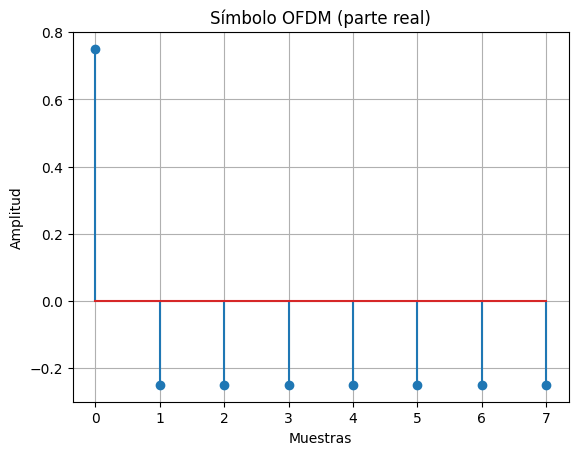

In [7]:
# 5. MÚLTIPLEXACIÓN OFDM
# ---------------------------------------------

"""
OFDM divide el canal en múltiples subportadoras ortogonales. Se usa extensamente en WiFi y 5G.
Aquí se simula una señal OFDM con 8 subportadoras.
"""

N = 8  # Número de subportadoras
data = np.random.choice([1, -1], N)  # BPSK
ofdm_signal = np.fft.ifft(data)

plt.figure()
plt.stem(np.real(ofdm_signal))
plt.title("Símbolo OFDM (parte real)")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()